Universidad del Valle de Guatemala
# Laboratorio 7
## Análisis de redes sociales

Daniel Valdez - 21240

Emilio Solano - 21212

In [103]:
import json
import pandas as pd
import re
from nltk.corpus import stopwords
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import networkx as nx


### Carga de datos

In [3]:
traficogt_data = []
with open('traficogt.txt', 'r', encoding='utf-16') as f:
    for line_number, line in enumerate(f, start=1):
        try:
            traficogt_data.append(json.loads(line))
        except json.JSONDecodeError:
            print(f"Se omitió la línea {line_number} debido a un error de decodificación.")

print("Cantidad de entradas en traficogt:", len(traficogt_data))
print("Primera entrada de traficogt:", traficogt_data[0] if traficogt_data else "Sin datos")

Se omitió la línea 5605 debido a un error de decodificación.
Cantidad de entradas en traficogt: 5604
Primera entrada de traficogt: {'id': 1834236045598056867, 'id_str': '1834236045598056867', 'url': 'https://x.com/traficogt/status/1834236045598056867', 'date': '2024-09-12 14:22:06+00:00', 'user': {'id': 93938886, 'id_str': '93938886', 'url': 'https://x.com/traficogt', 'username': 'traficogt', 'displayname': 'traficoGT', 'rawDescription': 'Noticias de ciudad de Guatemala', 'created': '2009-12-01 20:42:19+00:00', 'followersCount': 314368, 'friendsCount': 137, 'statusesCount': 52385, 'favouritesCount': 3471, 'listedCount': 291, 'mediaCount': 1292, 'location': 'Guatemala', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1782036597841530880/-tVuhOdK_normal.jpg', 'profileBannerUrl': None, 'protected': None, 'verified': False, 'blue': False, 'blueType': None, 'descriptionLinks': [], 'pinnedIds': [], '_type': 'snscrape.modules.twitter.User'}, 'lang': 'es', 'rawContent': 'Es comprensib

In [4]:
tioberny_data = []
with open('tioberny.txt', 'r', encoding='utf-16') as f:
    for line_number, line in enumerate(f, start=1):
        try:
            tioberny_data.append(json.loads(line))
        except json.JSONDecodeError:
            print(f"Se omitió la línea {line_number} debido a un error de decodificación.")

print("Cantidad de entradas en tioberny:", len(tioberny_data))
print("Primera entrada de tioberny:", tioberny_data[0] if tioberny_data else "Sin datos")

Cantidad de entradas en tioberny: 5019
Primera entrada de tioberny: {'id': 1834281080029110288, 'id_str': '1834281080029110288', 'url': 'https://x.com/La_ReVoluZzion/status/1834281080029110288', 'date': '2024-09-12 17:21:03+00:00', 'user': {'id': 1435062946598694914, 'id_str': '1435062946598694914', 'url': 'https://x.com/La_ReVoluZzion', 'username': 'La_ReVoluZzion', 'displayname': 'The_ReVoluZZzioN 🫡', 'rawDescription': '¡Defensor de los defensores de los DDHH, PRO-LGBTIXXX🏳️\u200d🌈 y demás sub especies!', 'created': '2021-09-07 02:11:21+00:00', 'followersCount': 2102, 'friendsCount': 531, 'statusesCount': 51984, 'favouritesCount': 143086, 'listedCount': 7, 'mediaCount': 18100, 'location': 'Cuba 🇨🇺', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1741646608679268353/M8PgJYKR_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1435062946598694914/1680473492', 'protected': None, 'verified': False, 'blue': False, 'blueType': None, 'descriptionLinks': [], 'pi

### Análisis de tweets

In [5]:
def analyze_tweets(data, source_name):
    print(f"\nAnálisis de tweets de {source_name}:")
    print(f"Cantidad de entradas: {len(data)}")
    
    if data:
        print("Ejemplos de contenido de tweets:")
        for tweet in data[:5]:  # Muestra los primeros 5 tweets
            print(f"User: {tweet['user']['username']} | Tweet: {tweet['rawContent']}\n")

In [6]:
analyze_tweets(traficogt_data, "traficogt")


Análisis de tweets de traficogt:
Cantidad de entradas: 5604
Ejemplos de contenido de tweets:
User: traficogt | Tweet: Es comprensible la resolución... El ruso sabe de engrasar maquinaria.

User: monymmorales | Tweet: La corrupción de la @CC_Guatemala
es descarada, falsificación de documentos y obligaron a extenderles DPI.
https://t.co/0J24ZCXJ2c

User: animaldgalaccia | Tweet: @PNCdeGuatemala @mingobguate @FJimenezmingob @diegoedeleon @amilcarmontejo @traficogt 

🚨🚨🚨🚨🚨

User: EstacionDobleA | Tweet: @amilcarmontejo @AztecaNoticiaGT @BancadaSemilla @BArevalodeLeon @diputadojp @EmisorasUnidas @eP_investiga @ImpactoNoticiGT @lahoragt @mingobguate @PrensaComunitar @Transito_mixco @DGTguate @PMT_VILLANUEVA @InfoTransitoGt @traficogt @PMT_SanJuanSac @PMTSanLucasSac @YenerPlaza

User: CubReserva | Tweet: @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEMPAGUA @muniguate @GuatemalaGob @Guatevision_tv @pattyo502 @karinapazGt @Josechic86 @vecinosz16 URGENTE zona 16 en deterioro por  tala inmoderada

In [7]:
analyze_tweets(tioberny_data, "tioberny")


Análisis de tweets de tioberny:
Cantidad de entradas: 5019
Ejemplos de contenido de tweets:
User: La_ReVoluZzion | Tweet: _
Confirmado Compañeres,

El impuesto por la @usembassyguate,
—Solo cuenta con el pagado apoyo de los @48CantonesToto a través de la @USAIDGuate y @UEGuatemala

@BArevalodeLeon huye y se esconde del Verdadero Pueblo Guatemalteco.

User: XelaNewsGt | Tweet: #URGENTE Lo que los medios #faferos no informaron ayer, acerca de la visita del presidente #BernardoArévalo a #NebajQuiché, donde fue sacado a toda prisa por #SAAS ya que  manifestantes pedían ser escuchados por el mandatario, quien decidió huir de esta manera.
#XelaNews 🇫🇷 https://t.co/UQQbnvlfTa

User: M24095273 | Tweet: @IvanDuque @BArevalodeLeon Con que usaste PEGASUS para espiar a tus detractores! obra de un narcisista sin conciencia, buena pinta por fuera corazon negro y podrido por dentro sin alma

User: carlosalbesc | Tweet: @IvanDuque @BArevalodeLeon Entre Ellos se entienden bien, y sÍ están  cuadrando u

### De JSON a DF

In [8]:
traficdf = pd.DataFrame(traficogt_data)

In [9]:
bernydf = pd.DataFrame(tioberny_data)

In [10]:
traficdf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,Es comprensible la resolución... El ruso sabe ...,0,0,1,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,La corrupción de la @CC_Guatemala\nes descarad...,0,56,84,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,@PNCdeGuatemala @mingobguate @FJimenezmingob @...,0,0,1,...,None,NaN,None,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,@amilcarmontejo @AztecaNoticiaGT @BancadaSemil...,0,0,0,...,None,1.833964e+18,1833963727575781534,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,@soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...,0,0,1,...,None,1.833664e+18,1833664431084949711,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet


In [11]:
bernydf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet


In [12]:
traficdf['rawContent'].tail()

5599    @traficogt Y no que presentando 5 mil firmas a...
5600    @hshetemul @traficogt Y de igual Manera quitan...
5601    @traficogt Es algo más fuerte que ellos no qui...
5602    @Factor4_GT @traficogt @CC_Guatemala @MPguatem...
5603             @AgenciaOcote @traficogt Vieja ignorante
Name: rawContent, dtype: object

In [13]:
bernydf['rawContent'].tail()

5014    @marvgcaceres @diaco_gt @GuatemalaGob @vinicio...
5015    @Soygeorgegt Lastima @BArevalodeLeon la gente ...
5016    Alguien sabe si este precio es culpa de @BArev...
5017    @guate_opina @BArevalodeLeon Y los diputados p...
5018    @ElQueNews @BArevalodeLeon @lucreciapeinado @F...
Name: rawContent, dtype: object

### Limpieza y Preprocesamiento de Datos

#### Preprocesamiento

##### Conversión de texto

In [14]:
traficdf['rawContent'] = traficdf['rawContent'].str.lower()
bernydf['rawContent'] = bernydf['rawContent'].str.lower()

In [15]:
traficdf['rawContent'].tail()

5599    @traficogt y no que presentando 5 mil firmas a...
5600    @hshetemul @traficogt y de igual manera quitan...
5601    @traficogt es algo más fuerte que ellos no qui...
5602    @factor4_gt @traficogt @cc_guatemala @mpguatem...
5603             @agenciaocote @traficogt vieja ignorante
Name: rawContent, dtype: object

In [16]:
bernydf['rawContent'].tail()

5014    @marvgcaceres @diaco_gt @guatemalagob @vinicio...
5015    @soygeorgegt lastima @barevalodeleon la gente ...
5016    alguien sabe si este precio es culpa de @barev...
5017    @guate_opina @barevalodeleon y los diputados p...
5018    @elquenews @barevalodeleon @lucreciapeinado @f...
Name: rawContent, dtype: object

##### Eliminación de caracteres especiales

In [17]:
# Create a column with hashtags
traficdf["hashtags"] 


0       []
1       []
2       []
3       []
4       []
        ..
5599    []
5600    []
5601    []
5602    []
5603    []
Name: hashtags, Length: 5604, dtype: object

In [18]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'[@#\'“”]', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'[@#\'“”]', '', regex=True)

In [19]:
traficdf['rawContent'].tail()

5599    traficogt y no que presentando 5 mil firmas an...
5600    hshetemul traficogt y de igual manera quitan e...
5601    traficogt es algo más fuerte que ellos no quie...
5602    factor4_gt traficogt cc_guatemala mpguatemala ...
5603               agenciaocote traficogt vieja ignorante
Name: rawContent, dtype: object

In [20]:
bernydf['rawContent'].tail()

5014    marvgcaceres diaco_gt guatemalagob vinicioguti...
5015    soygeorgegt lastima barevalodeleon la gente qu...
5016    alguien sabe si este precio es culpa de bareva...
5017    guate_opina barevalodeleon y los diputados pid...
5018    elquenews barevalodeleon lucreciapeinado fjime...
Name: rawContent, dtype: object

##### Eliminación de URLs

In [21]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

#####   Eliminación de signos de puntuación

In [22]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', regex=True)

##### Eliminación de Stopwords

In [23]:
stop_words = set(stopwords.words('spanish'))

traficdf['rawContent'] = traficdf['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
bernydf['rawContent'] = bernydf['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

##### Eliminación de números

In [24]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'\d+', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'\d+', '', regex=True)

##### Verificación de DataFrames

In [25]:
traficdf['rawContent'].tail()

5599    traficogt presentando  mil firmas congrueso ra...
5600    hshetemul traficogt igual manera quitan derech...
5601              traficogt fuerte quieren sepa renuncian
5602         factor_gt traficogt cc_guatemala mpguatemala
5603               agenciaocote traficogt vieja ignorante
Name: rawContent, dtype: object

In [26]:
bernydf['rawContent'].tail()

5014    marvgcaceres diaco_gt guatemalagob vinicioguti...
5015    soygeorgegt lastima barevalodeleon gente rodea...
5016       alguien sabe si precio culpa barevalodeleon ??
5017    guate_opina barevalodeleon diputados pidiendo ...
5018    elquenews barevalodeleon lucreciapeinado fjime...
Name: rawContent, dtype: object

In [27]:
traficdf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,comprensible resolución... ruso sabe engrasar ...,0,0,1,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,"corrupción cc_guatemala descarada, falsificaci...",0,56,84,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,pncdeguatemala mingobguate fjimenezmingob dieg...,0,0,1,...,None,NaN,None,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,amilcarmontejo aztecanoticiagt bancadasemilla ...,0,0,0,...,None,1.833964e+18,1833963727575781534,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,soy_ aztecanoticiagt conapgt denunciaempagua m...,0,0,1,...,None,1.833664e+18,1833664431084949711,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet


In [28]:
bernydf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_ confirmado compañeres, impuesto usembassygua...",0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,"urgente medios faferos informaron ayer, acerca...",12,80,142,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,ivanduque barevalodeleon usaste pegasus espiar...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,"ivanduque barevalodeleon entienden bien, cuadr...",0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,presidente barevalodeleon vicepresidenta karin...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet


#### Extracción de relaciones

In [29]:
bernyInteractions = bernydf[['user', 'mentionedUsers', 'retweetCount', "hashtags"]]
traficInteractions = traficdf[['user', 'mentionedUsers', 'retweetCount', 'hashtags']]

In [30]:
interactions = pd.concat([bernyInteractions, traficInteractions])

In [31]:
interactions

,user,mentionedUsers,retweetCount,hashtags
0,"{'id': 1435062946598694914, 'id_str': '1435062...","[{'id': 23664866, 'id_str': '23664866', 'usern...",0,[]
1,"{'id': 956650778634145792, 'id_str': '95665077...",[],80,"[URGENTE, faferos, BernardoArévalo, NebajQuich..."
2,"{'id': 1087057038755143680, 'id_str': '1087057...","[{'id': 77653794, 'id_str': '77653794', 'usern...",0,[]
3,"{'id': 2881001877, 'id_str': '2881001877', 'ur...","[{'id': 77653794, 'id_str': '77653794', 'usern...",0,[]
4,"{'id': 3013862206, 'id_str': '3013862206', 'ur...","[{'id': 945378369818058752, 'id_str': '9453783...",0,[]
...,...,...,...,...
5599,"{'id': 27352856, 'id_str': '27352856', 'url': ...","[{'id': 93938886, 'id_str': '93938886', 'usern...",0,[]
5600,"{'id': 591424023, 'id_str': '591424023', 'url'...","[{'id': 633615711, 'id_str': '633615711', 'use...",0,[]
5601,"{'id': 1572301195032625152, 'id_str': '1572301...","[{'id': 93938886, 'id_str': '93938886', 'usern...",0,[]
5602,"{'id': 591424023, 'id_str': '591424023', 'url'...","[{'id': 1241496971678015489, 'id_str': '124149...",0,[]


In [32]:
interactions['user']

0       {'id': 1435062946598694914, 'id_str': '1435062...
1       {'id': 956650778634145792, 'id_str': '95665077...
2       {'id': 1087057038755143680, 'id_str': '1087057...
3       {'id': 2881001877, 'id_str': '2881001877', 'ur...
4       {'id': 3013862206, 'id_str': '3013862206', 'ur...
                              ...                        
5599    {'id': 27352856, 'id_str': '27352856', 'url': ...
5600    {'id': 591424023, 'id_str': '591424023', 'url'...
5601    {'id': 1572301195032625152, 'id_str': '1572301...
5602    {'id': 591424023, 'id_str': '591424023', 'url'...
5603    {'id': 3062000839, 'id_str': '3062000839', 'ur...
Name: user, Length: 10623, dtype: object

In [33]:
interactions['user'].iloc[0].keys()

dict_keys(['id', 'id_str', 'url', 'username', 'displayname', 'rawDescription', 'created', 'followersCount', 'friendsCount', 'statusesCount', 'favouritesCount', 'listedCount', 'mediaCount', 'location', 'profileImageUrl', 'profileBannerUrl', 'protected', 'verified', 'blue', 'blueType', 'descriptionLinks', 'pinnedIds', '_type'])

#### Normalización y limpieza de duplicados

In [34]:
interactions['user'] = interactions['user'].apply(lambda x: x['username'] if isinstance(x, dict) and 'username' in x else None)

interactions['user'] = interactions['user'].str.lower()

# Normalizar nombres mencionados en la columna 'mentionedUsers'
interactions['mentionedUsers'] = interactions['mentionedUsers'].apply(lambda x: [user['username'].lower() for user in x] if isinstance(x, list) else [])


In [35]:
interactions

,user,mentionedUsers,retweetCount,hashtags
0,la_revoluzzion,"[usembassyguate, 48cantonestoto, usaidguate, u...",0,[]
1,xelanewsgt,[],80,"[URGENTE, faferos, BernardoArévalo, NebajQuich..."
2,m24095273,"[ivanduque, barevalodeleon]",0,[]
3,carlosalbesc,"[ivanduque, barevalodeleon]",0,[]
4,brenda_agn,"[barevalodeleon, karinherreravp, agn_noticias,...",0,[]
...,...,...,...,...
5599,guiselabarrios,[traficogt],0,[]
5600,mvtrooper,"[hshetemul, traficogt, mpguatemala, cangguatem...",0,[]
5601,elmeronene1,[traficogt],0,[]
5602,mvtrooper,"[factor4_gt, traficogt, cc_guatemala, mpguatem...",0,[]


#### Estructura de Datos para Análisis de Redes

In [36]:
# Supongamos que `interactions` tiene las columnas ['user', 'mentionedUsers', 'retweetCount']
edges = []
for _, row in interactions.iterrows():
    user = row['user']
    for mention in row['mentionedUsers']:
        edges.append((user, mention, row['retweetCount'], row['hashtags']))

edgesdf = pd.DataFrame(edges, columns=['source', 'target', 'retweetCount', 'hashtags']) 


In [37]:
edgesdf.to_csv("edges.csv")

In [38]:
interactions.to_csv("interactions.csv")

In [39]:
traficdf.to_csv("trafic.csv")

In [40]:
bernydf.to_csv("berny.csv")

### Análisis exploratorio

#### @traficogt

In [105]:
traficdf = pd.read_csv('trafic.csv', index_col=0)

In [106]:
traficdf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,comprensible resolución... ruso sabe engrasar ...,0,0,1,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,"corrupción cc_guatemala descarada, falsificaci...",0,56,84,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,pncdeguatemala mingobguate fjimenezmingob dieg...,0,0,1,...,NaN,NaN,NaN,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,amilcarmontejo aztecanoticiagt bancadasemilla ...,0,0,0,...,NaN,1.833964e+18,1.833964e+18,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,soy_ aztecanoticiagt conapgt denunciaempagua m...,0,0,1,...,NaN,1.833664e+18,1.833664e+18,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet


##### Número total de Tweets

In [107]:
numTweets = len(traficdf)
print(f'Número total de tweets: {numTweets}')

Número total de tweets: 5604


##### Número de usuarios únicos

In [108]:
traficdf['username'] = traficdf['user'].apply(lambda x: ast.literal_eval(x)['username'])

# Contar usuarios únicos
uniques = traficdf['username'].nunique()
print(f'Número de usuarios únicos: {uniques}')


Número de usuarios únicos: 2071


##### Hashtags más frecuentes


In [109]:
traficdf['hashtags'] = traficdf['hashtags'].apply(lambda x: ast.literal_eval(x))

allHashtags = [hashtag for sublist in traficdf['hashtags'] for hashtag in sublist]

from collections import Counter
hashtagsFreq = Counter(allHashtags)

# Mostrar los 10 hashtags más comunes
print(hashtagsFreq.most_common(10))


[('AhoraLH', 18), ('AHORA', 18), ('Guatemala', 16), ('RenuncienGolpistas', 13), ('URGENTE', 10), ('guatemala', 9), ('ParoNacionalIndefinido', 9), ('Ahora', 8), ('LaHoraDeActualizarnos', 8), ('GuateResiste', 8)]


##### Nube de palabras de los tweets

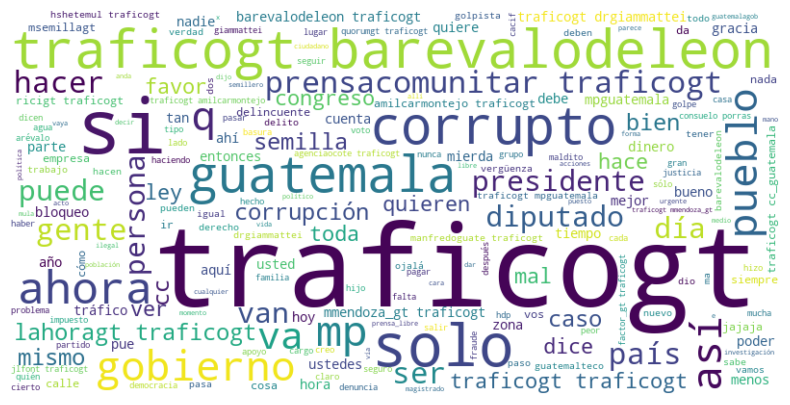

In [110]:
# Crear una cadena con todo el contenido de los tweets
allText = " ".join(tweet for tweet in traficdf['rawContent'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(allText)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##### ¿Cómo se distribuyen los tweets en el tiempo? ¿Hay picos de actividad en ciertos días u horas?


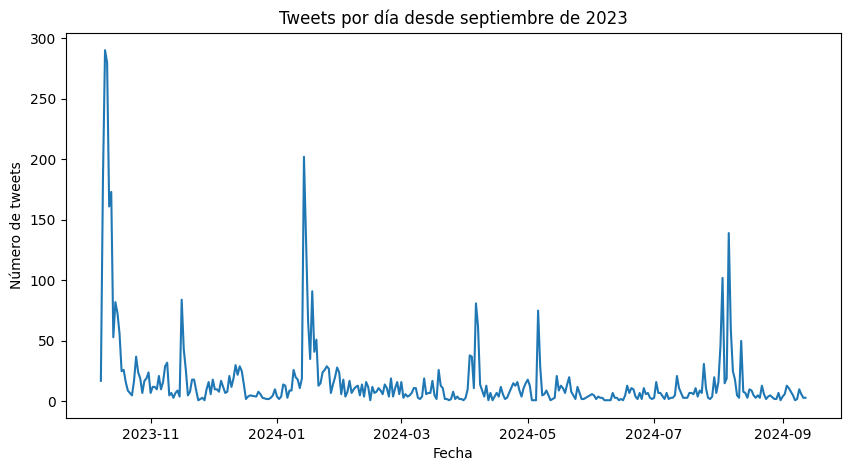

In [111]:
traficdf['date'] = pd.to_datetime(traficdf['date'])

date0 = '2023-09-01'
filtered_df = traficdf[traficdf['date'] >= date0]

filtered_df['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 5), title='Tweets por día desde septiembre de 2023')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.show()


##### ¿Cuáles son los usuarios más mencionados y cómo interactúan con otros usuarios?

In [112]:
# Extraer los usuarios mencionados
traficdf['mentionedUsers'] = traficdf['mentionedUsers'].apply(lambda x: ast.literal_eval(x))

# Contar las menciones de usuarios
mentions = [user['username'] for sublist in traficdf['mentionedUsers'] for user in sublist]
mencionsFreq = Counter(mentions)

# Mostrar las 10 menciones más comunes
print(mencionsFreq.most_common(10))

[('traficogt', 4243), ('BArevalodeLeon', 432), ('DrGiammattei', 174), ('amilcarmontejo', 166), ('PrensaComunitar', 162), ('MPguatemala', 138), ('mmendoza_GT', 132), ('lahoragt', 128), ('CC_Guatemala', 110), ('muniguate', 99)]


#### @BArevalodeLeon

In [113]:
bernydf = pd.read_csv('berny.csv', index_col=0)

In [114]:
bernydf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_ confirmado compañeres, impuesto usembassygua...",0,0,0,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,"urgente medios faferos informaron ayer, acerca...",12,80,142,...,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",NaN,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,ivanduque barevalodeleon usaste pegasus espiar...,0,0,0,...,NaN,1.834197e+18,1.834197e+18,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,"ivanduque barevalodeleon entienden bien, cuadr...",0,0,0,...,NaN,1.834197e+18,1.834197e+18,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,presidente barevalodeleon vicepresidenta karin...,0,0,0,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,NaN,snscrape.modules.twitter.Tweet


In [115]:
bernydf.describe()

,id,id_str,replyCount,retweetCount,likeCount,quoteCount,bookmarkedCount,conversationId,conversationIdStr,viewCount,retweetedTweet,coordinates,inReplyToTweetId,inReplyToTweetIdStr
count,5.019000e+03,5.019000e+03,5019.000000,5019.000000,5019.000000,5019.000000,5019.00000,5.019000e+03,5.019000e+03,4.938000e+03,0.0,0.0,4.276000e+03,4.276000e+03
mean,1.832892e+18,1.832892e+18,7.408249,21.775254,109.174935,1.780634,4.95796,1.832341e+18,1.832341e+18,6.244600e+03,NaN,NaN,1.832930e+18,1.832930e+18
std,2.155786e+16,2.155786e+16,110.363737,279.448721,1869.974212,25.948332,111.26089,2.338536e+16,2.338536e+16,1.486038e+05,NaN,NaN,9.878118e+15,9.878118e+15
min,8.094212e+17,8.094212e+17,0.000000,0.000000,0.000000,0.000000,0.00000,8.094212e+17,8.094212e+17,1.000000e+00,NaN,NaN,1.257873e+18,1.257873e+18
25%,1.833204e+18,1.833204e+18,0.000000,0.000000,0.000000,0.000000,0.00000,1.832935e+18,1.832935e+18,8.000000e+00,NaN,NaN,1.832965e+18,1.832965e+18
50%,1.833598e+18,1.833598e+18,0.000000,0.000000,0.000000,0.000000,0.00000,1.833493e+18,1.833493e+18,2.500000e+01,NaN,NaN,1.833493e+18,1.833493e+18
75%,1.833910e+18,1.833910e+18,0.000000,0.000000,2.000000,0.000000,0.00000,1.833674e+18,1.833674e+18,8.800000e+01,NaN,NaN,1.833659e+18,1.833659e+18
max,1.834281e+18,1.834281e+18,4783.000000,8307.000000,67416.000000,1336.000000,5277.00000,1.834281e+18,1.834281e+18,8.495723e+06,NaN,NaN,1.834279e+18,1.834279e+18


In [116]:
bernydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5019 entries, 0 to 5018
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5019 non-null   int64  
 1   id_str               5019 non-null   int64  
 2   url                  5019 non-null   object 
 3   date                 5019 non-null   object 
 4   user                 5019 non-null   object 
 5   lang                 5019 non-null   object 
 6   rawContent           5016 non-null   object 
 7   replyCount           5019 non-null   int64  
 8   retweetCount         5019 non-null   int64  
 9   likeCount            5019 non-null   int64  
 10  quoteCount           5019 non-null   int64  
 11  bookmarkedCount      5019 non-null   int64  
 12  conversationId       5019 non-null   int64  
 13  conversationIdStr    5019 non-null   int64  
 14  hashtags             5019 non-null   object 
 15  cashtags             5019 non-null   object

##### Menciones y hashtags más frecuentes

In [117]:
bernydf['mentionedUsers'] = bernydf['mentionedUsers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
allMentions = [mention['username'] for mentions in bernydf['mentionedUsers'] for mention in mentions]
mentionCounts = Counter(allMentions)

# Extraer hashtags
bernydf['hashtags'] = bernydf['hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
allHashtags = [hashtag for hashtags in bernydf['hashtags'] for hashtag in hashtags]
hashtagCounts = Counter(allHashtags)

# Mostrar las menciones y hashtags más frecuentes
print("Top 10 menciones más frecuentes:")
print(mentionCounts.most_common(10))

print("\nTop 10 hashtags más frecuentes:")
print(hashtagCounts.most_common(10))

Top 10 menciones más frecuentes:
[('BArevalodeLeon', 4830), ('GuatemalaGob', 915), ('UbaldoMacu', 574), ('santipalomov', 528), ('MPguatemala', 466), ('FJimenezmingob', 403), ('mingobguate', 291), ('__VaderTG', 273), ('CongresoGuate', 254), ('DiariodeCA', 219)]

Top 10 hashtags más frecuentes:
[('URGENTE', 26), ('GuatemalaSaleAdelante', 25), ('MinfinSaleAdelante', 17), ('Guatemala', 15), ('Presupuesto2025', 14), ('UnPresupuestoParaLaPoblación', 13), ('EnElPaísDCA', 12), ('NacionalesAGN', 8), ('XelaNews', 7), ('ElEstor', 7)]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1912\2254023468.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mentionValues, y=mentionLabels, palette="Blues_d")


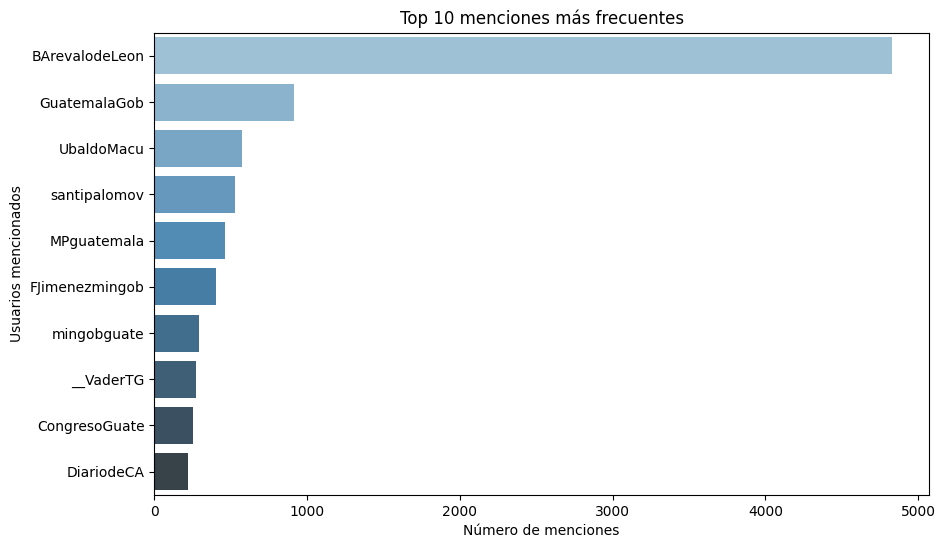

In [118]:
topMentions = mentionCounts.most_common(10)
mentionLabels, mentionValues = zip(*topMentions)

plt.figure(figsize=(10, 6))
sns.barplot(x=mentionValues, y=mentionLabels, palette="Blues_d")
plt.title('Top 10 menciones más frecuentes')
plt.xlabel('Número de menciones')
plt.ylabel('Usuarios mencionados')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1912\1673688603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtagValues, y=hashtagLabels, palette="Greens_d")


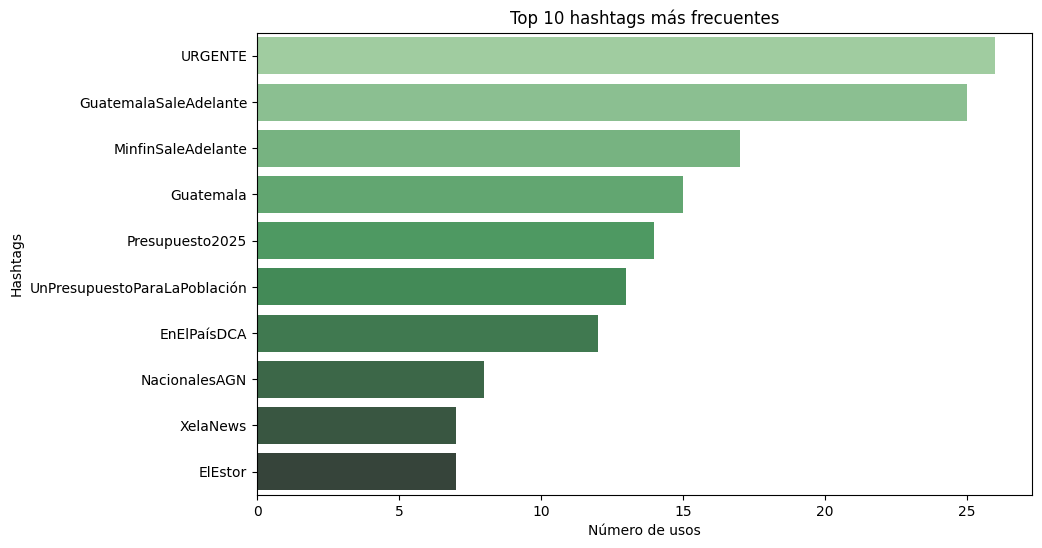

In [119]:
topHashtags = hashtagCounts.most_common(10)
hashtagLabels, hashtagValues = zip(*topHashtags)

plt.figure(figsize=(10, 6))
sns.barplot(x=hashtagValues, y=hashtagLabels, palette="Greens_d")
plt.title('Top 10 hashtags más frecuentes')
plt.xlabel('Número de usos')
plt.ylabel('Hashtags')
plt.show()

##### Word Cloud

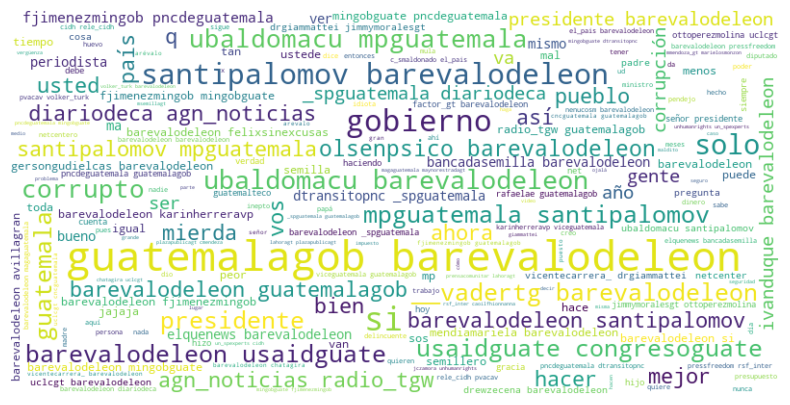

In [120]:
text = ' '.join(bernydf['rawContent'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Interacciones en ambas cuentas

In [121]:
interactions = pd.read_csv("interactions.csv", index_col=0)

In [122]:
interactions.head()

,user,mentionedUsers,retweetCount,hashtags
0,la_revoluzzion,"['usembassyguate', '48cantonestoto', 'usaidgua...",0,[]
1,xelanewsgt,[],80,"['URGENTE', 'faferos', 'BernardoArévalo', 'Neb..."
2,m24095273,"['ivanduque', 'barevalodeleon']",0,[]
3,carlosalbesc,"['ivanduque', 'barevalodeleon']",0,[]
4,brenda_agn,"['barevalodeleon', 'karinherreravp', 'agn_noti...",0,[]


In [123]:
interactions.describe(include='all')

,user,mentionedUsers,retweetCount,hashtags
count,10623,10623,10623.000000,10623
unique,4291,2870,NaN,423
top,traficogt,[],NaN,[]
freq,781,1300,NaN,9971
mean,NaN,NaN,26.186670,NaN
std,NaN,NaN,224.509005,NaN
min,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,NaN
50%,NaN,NaN,0.000000,NaN
75%,NaN,NaN,0.000000,NaN


##### Número total de tweets, usuarios únicos y hashtags

In [124]:
lenTweets = len(interactions)

uniques = interactions['user'].nunique()

hashtagsFlattened = [hashtag for hashtags in interactions['hashtags'] for hashtag in eval(hashtags)]
uniqueHashtags = len(set(hashtagsFlattened))

print(f"Total de tweets: {lenTweets}")
print(f"Usuarios únicos: {uniques}")
print(f"Hashtags únicos: {uniqueHashtags}")


Total de tweets: 10623
Usuarios únicos: 4291
Hashtags únicos: 524


##### Menciones más comunes

In [125]:
interactions['mentionedUsers'] = interactions['mentionedUsers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

allMentions = [mention for mentions in interactions['mentionedUsers'] for mention in mentions]
mentionCounts = Counter(allMentions)

print("Top 10 menciones más frecuentes:")
print(mentionCounts.most_common(10))


Top 10 menciones más frecuentes:
[('barevalodeleon', 5262), ('traficogt', 4244), ('guatemalagob', 965), ('mpguatemala', 604), ('ubaldomacu', 574), ('santipalomov', 533), ('fjimenezmingob', 417), ('drgiammattei', 329), ('mingobguate', 314), ('congresoguate', 308)]


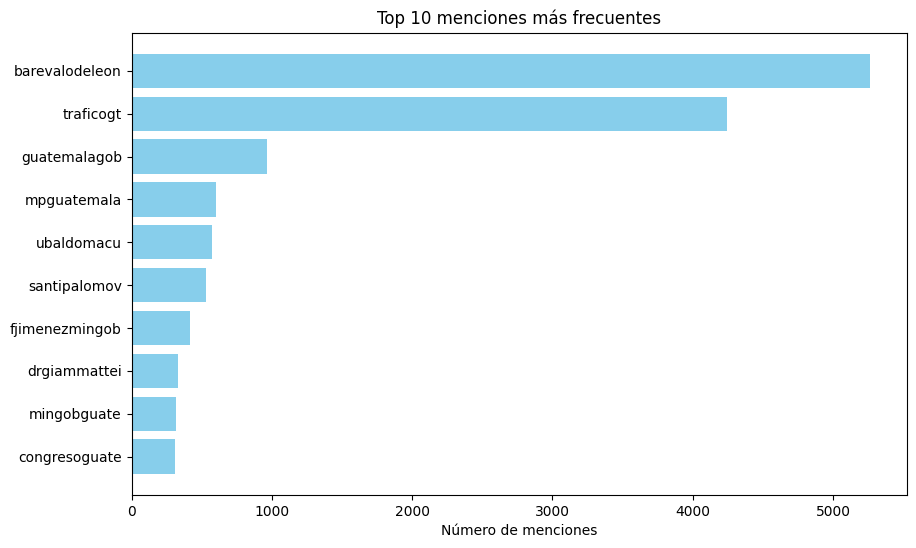

In [126]:
topMentions = mentionCounts.most_common(10)
names, counts = zip(*topMentions)

plt.figure(figsize=(10, 6))
plt.barh(names, counts, color='skyblue')
plt.xlabel('Número de menciones')
plt.title('Top 10 menciones más frecuentes')
plt.gca().invert_yaxis()
plt.show()

##### Hashtags más comunes

In [127]:
interactions['hashtags'] = interactions['hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

allHashtags = [hashtag for hashtags in interactions['hashtags'] for hashtag in hashtags]
hashtagCounts = Counter(allHashtags)

print("Top 10 hashtags más frecuentes:")
print(hashtagCounts.most_common(10))


Top 10 hashtags más frecuentes:
[('URGENTE', 36), ('Guatemala', 31), ('GuatemalaSaleAdelante', 25), ('AHORA', 23), ('AhoraLH', 18), ('MinfinSaleAdelante', 17), ('Presupuesto2025', 14), ('UnPresupuestoParaLaPoblación', 13), ('TraficoGT', 13), ('RenuncienGolpistas', 13)]


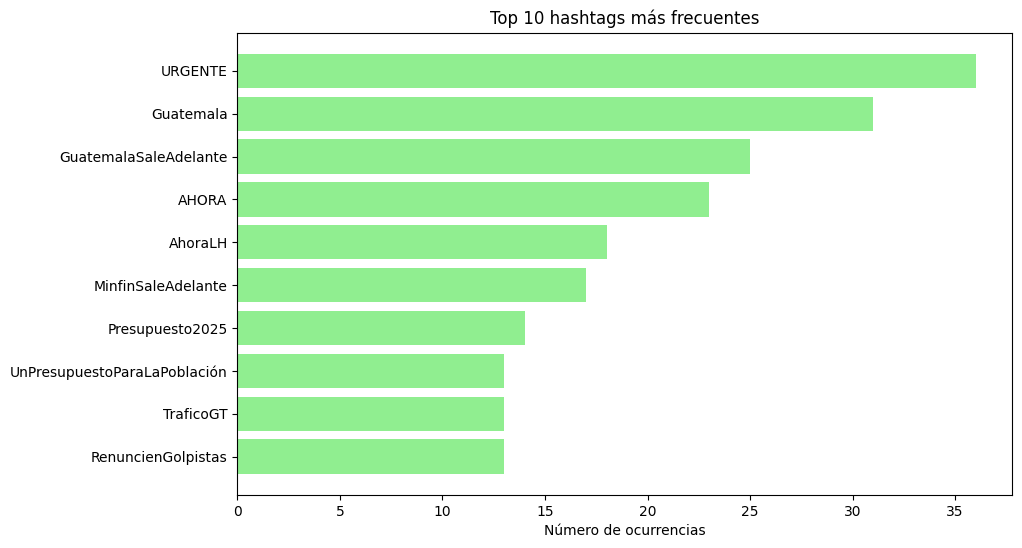

In [128]:
topHashtags = hashtagCounts.most_common(10)
hashNames, hashCounts = zip(*topHashtags)

plt.figure(figsize=(10, 6))
plt.barh(hashNames, hashCounts, color='lightgreen')
plt.xlabel('Número de ocurrencias')
plt.title('Top 10 hashtags más frecuentes')
plt.gca().invert_yaxis()
plt.show()

##### Word Cloud

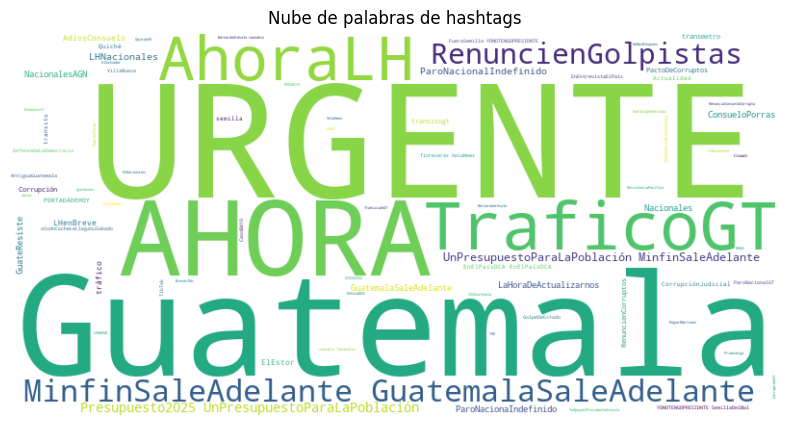

In [129]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_hashtags))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de hashtags")
plt.show()

##### ¿Qué usuarios están más involucrados en conversaciones sobre eventos políticos y cómo interactúan entre ellos?

In [130]:
keywords = ['elecciones', 'gobierno', 'protesta', 'política', 'BernardoArévalo']

tweets = interactions[
    interactions['hashtags'].apply(lambda x: any(keyword in x for keyword in keywords)) |
    interactions['user'].str.contains('|'.join(keywords), case=False)
]


In [131]:
userInteractions = []

for _, row in tweets.iterrows():
    user = row['user']
    mentioned_users = row['mentionedUsers']
    for mentioned_user in mentioned_users:
        userInteractions.append((user, mentioned_user))

interactiondf = pd.DataFrame(userInteractions, columns=['user', 'mentioned_user'])
interactionCounts = interactiondf.groupby(['user', 'mentioned_user']).size().reset_index(name='counts')

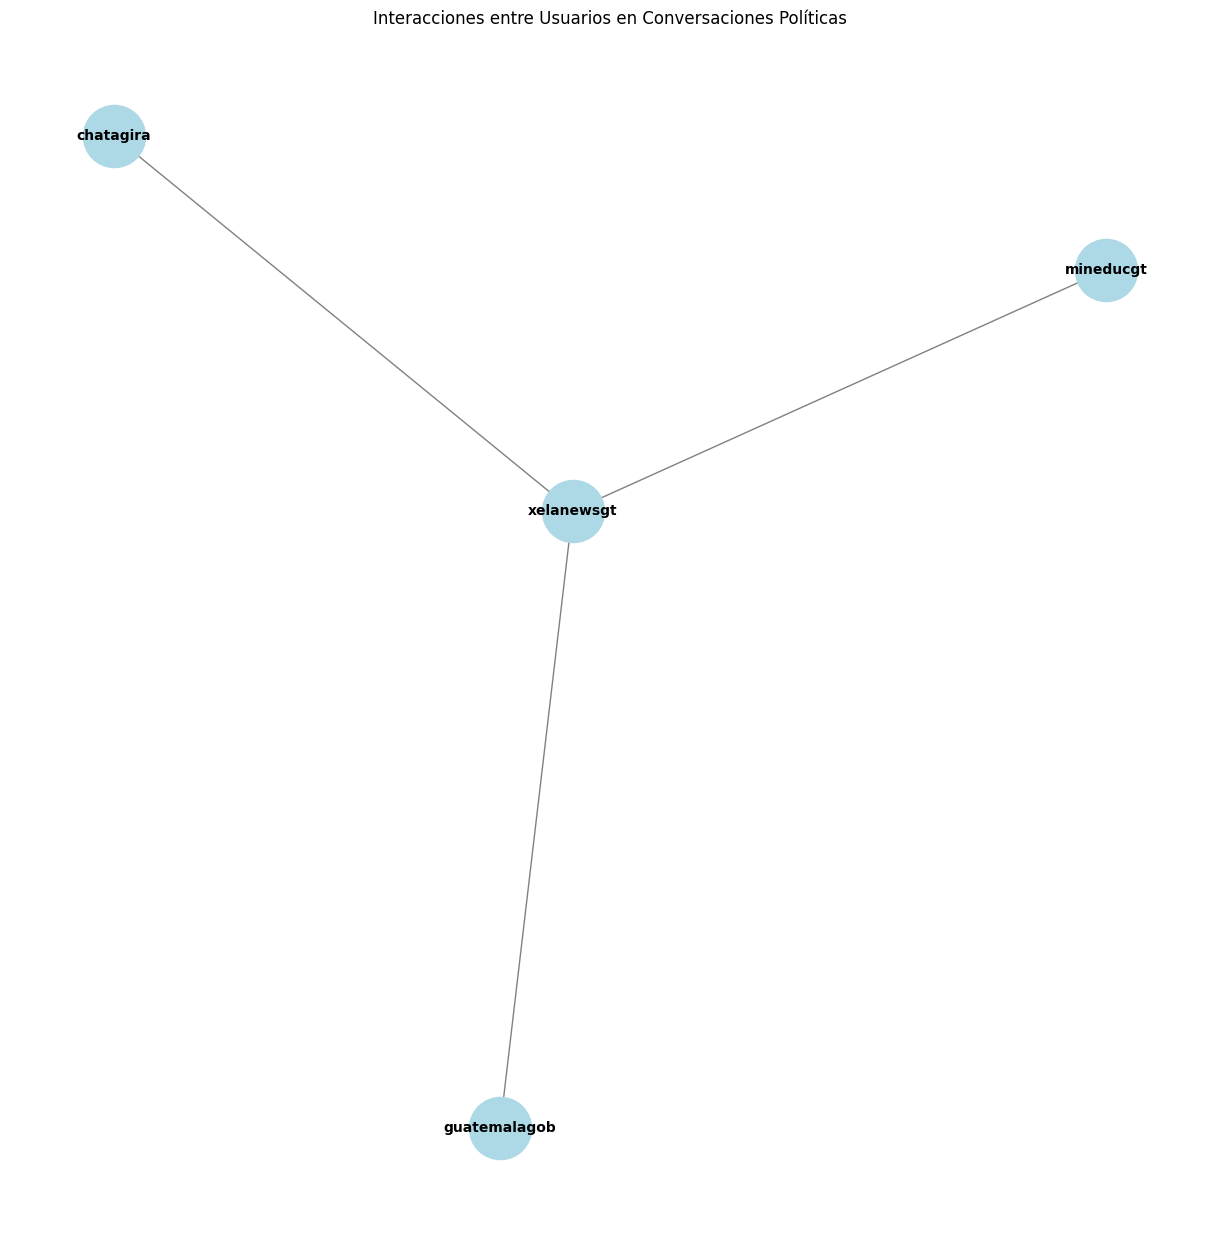

In [132]:
graph = nx.from_pandas_edgelist(interactionCounts, 'user', 'mentioned_user', ['counts'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph)  # Layout para el grafo
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Interacciones entre Usuarios en Conversaciones Políticas')
plt.show()
